In [53]:
import tensorflow as tf
from IPython.display import Latex
tf.VERSION

'1.9.0'

In [54]:
hello = tf.constant('hello you god damn tensorflow')
sess = tf.Session()
print(sess.run(hello))

b'hello you god damn tensorflow'


In [55]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)
print('node1:', node1, 'node2:', node2)
print('node3:', node3)

node1: Tensor("Const_26:0", shape=(), dtype=float32) node2: Tensor("Const_27:0", shape=(), dtype=float32)
node3: Tensor("Add_24:0", shape=(), dtype=float32)


In [56]:
sess = tf.Session()
print('sess.run(node1,node2):', sess.run([node1, node2]))
print('sess.run(node3):', sess.run(node3))

sess.run(node1,node2): [3.0, 4.0]
sess.run(node3): 7.0


In [57]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a+b

print(sess.run(adder_node, feed_dict={a: 3.6, b: 10.7}))
print(sess.run(adder_node, feed_dict={a: [1, 3], b: [5, 6]}))

14.299999
[6. 9.]


In [58]:
3
[1, 3, 4]
[[1, 45, 617], [51, 2512, 71]]
[[[1., 4.], [[4, 6]]]]

[[[1.0, 4.0], [[4, 6]]]]

## Linear Regression

In [59]:
#sample code
'''
y_model = tf.mul(X, w)  # linear function
cost = tf.square(Y-y_model)  # cost fuction
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)  
'''
# try to get the min cost of the convex function

'\ny_model = tf.mul(X, w)  # linear function\ncost = tf.square(Y-y_model)  # cost fuction\ntrain_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)  \n'

In [60]:
# data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# cost function
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = x_train*W+b

cost = tf.reduce_mean(tf.square(hypothesis-y_train))

# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# launch the graph in session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
        
# learn rate cause W swap between 1 

0 1.0892153 [-0.2480714] [2.7214437]
20 0.9784155 [-0.1528319] [2.6096394]
40 0.88851434 [-0.09516941] [2.4885283]
60 0.8069621 [-0.04336881] [2.3717227]
80 0.7328958 [0.00569729] [2.2602742]
100 0.6656277 [0.0524289] [2.1540508]
120 0.6045337 [0.0969616] [2.0528185]
140 0.54904735 [0.139401] [1.9563438]
160 0.49865362 [0.17984602] [1.8644028]
180 0.45288503 [0.21839024] [1.7767825]
200 0.41131738 [0.25512308] [1.6932803]
220 0.3735651 [0.29012954] [1.6137024]
240 0.33927783 [0.32349083] [1.5378643]
260 0.3081376 [0.35528424] [1.4655905]
280 0.2798555 [0.38558352] [1.396713]
300 0.25416914 [0.4144589] [1.3310726]
320 0.23084043 [0.44197717] [1.2685169]
340 0.20965306 [0.46820214] [1.2089015]
360 0.19041021 [0.49319473] [1.1520875]
380 0.1729336 [0.5170128] [1.0979434]
400 0.15706113 [0.5397114] [1.0463443]
420 0.14264536 [0.56134325] [0.9971699]
440 0.12955283 [0.5819585] [0.9503066]
460 0.11766198 [0.6016049] [0.90564567]
480 0.10686246 [0.62032807] [0.86308366]
500 0.09705422 [0.6381

In [61]:
# data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
for step in range(2001):
    cost_val,W_val,b_val,_=\
    sess.run([cost,W,b,train],
             feed_dict={X:[1,2,3],Y:[1,2,3]})
    if step % 20==0:
        print(step,cost_val,W_val,b_val)

0 7.0990856e-05 [0.9902377] [0.02219215]
20 6.447496e-05 [0.9906965] [0.02114915]
40 5.8557187e-05 [0.99113363] [0.02015521]
60 5.3183187e-05 [0.9915504] [0.01920799]
80 4.830152e-05 [0.9919475] [0.01830528]
100 4.3868455e-05 [0.9923259] [0.017445]
120 3.9842376e-05 [0.99268657] [0.01662516]
140 3.618553e-05 [0.99303025] [0.01584384]
160 3.2863925e-05 [0.9933578] [0.01509927]
180 2.9847646e-05 [0.99367] [0.01438967]
200 2.710807e-05 [0.9939675] [0.01371341]
220 2.4620545e-05 [0.99425095] [0.0130689]
240 2.2360213e-05 [0.99452114] [0.01245472]
260 2.0307587e-05 [0.99477863] [0.01186941]
280 1.8443834e-05 [0.9950241] [0.01131157]
300 1.675108e-05 [0.9952579] [0.01077994]
320 1.5213945e-05 [0.9954807] [0.01027334]
340 1.3817514e-05 [0.9956931] [0.00979053]
360 1.254869e-05 [0.99589556] [0.00933041]
380 1.1397276e-05 [0.99608845] [0.00889192]
400 1.0351421e-05 [0.99627227] [0.00847403]
420 9.401382e-06 [0.99644744] [0.00807579]
440 8.538459e-06 [0.99661446] [0.00769624]
460 7.754649e-06 [0

## Logistic Regression

In [62]:
#sigmoid function looks like 'S' shape
Latex(r"$H(x) = \frac{1}{1+e^-XW}$")

<IPython.core.display.Latex object>

In [63]:
#data
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X=tf.placeholder(tf.float32,shape=[None,2])
Y=tf.placeholder(tf.float32,shape=[None,1])

W=tf.Variable(tf.random_normal([2,1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')
hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val,_=sess.run([cost,train],feed_dict={X:x_data,Y:y_data})
        if step % 20==0:
            print(step,cost_val)
    h,c,a=sess.run([hypothesis,predicted,accuracy],
                   feed_dict={X:x_data,Y:y_data})
    print('\nhypothesis:',h,'\nCorrect:',c,'\nAccuarcy:',a)

0 2.9463236
20 1.7381445
40 1.1139535
60 0.9436195
80 0.88794726
100 0.8515503
120 0.8201676
140 0.79167
160 0.76561886
180 0.7418106
200 0.7200713
220 0.7002321
240 0.68212813
260 0.6656025
280 0.65050656
300 0.63670224
320 0.62406224
340 0.61246985
360 0.6018193
380 0.5920151
400 0.5829709
420 0.5746098
440 0.5668623
460 0.55966675
480 0.55296797
500 0.5467168
520 0.54086924
540 0.53538615
560 0.53023267
580 0.5253775
600 0.5207929
620 0.5164538
640 0.5123379
660 0.5084255
680 0.5046982
700 0.5011402
720 0.49773702
740 0.49447563
760 0.49134418
780 0.48833203
800 0.48542988
820 0.48262882
840 0.4799211
860 0.47729945
880 0.47475758
900 0.47228968
920 0.46989015
940 0.46755433
960 0.4652777
980 0.4630562
1000 0.46088603
1020 0.458764
1040 0.45668688
1060 0.4546518
1080 0.45265618
1100 0.45069763
1120 0.44877395
1140 0.446883
1160 0.44502306
1180 0.44319233
1200 0.44138917
1220 0.43961203
1240 0.43785977
1260 0.43613112
1280 0.43442473
1300 0.4327396
1320 0.43107477
1340 0.42942926
136

## Softmax Function

*softmax function isn't 'hard' as its name.now you have choose max one in A,B(A>B)*<br>
*if using 'hard' function, it will always be A.*<br>
**HOWEVER**, *in softmax function, sometimes you may take B as well,relevant with its probaility*

In [64]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5],                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]
X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis=tf.nn.softmax(tf.matmul(X,W)+b)
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(optimizer,feed_dict={X:x_data,Y:y_data})
        if step%200==0:
            print(step,sess.run(cost,feed_dict={X:x_data,Y:y_data}))
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], 
                                          [1, 3, 4, 3], 
                                          [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 1.0962545
200 0.58344424
400 0.48197332
600 0.3887133
800 0.29759678
1000 0.23651946
1200 0.21431586
1400 0.19581911
1600 0.18016206
1800 0.16674337
2000 0.15512192
[[8.6660925e-03 9.9132466e-01 9.1623915e-06]
 [8.1411171e-01 1.6752347e-01 1.8364852e-02]
 [1.1199444e-08 3.3190742e-04 9.9966812e-01]] [1 0 2]


## Predict number with pic(using google's sample)// unfinished

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.563860096
Epoch: 0002, Cost: 1.079840734
Epoch: 0003, Cost: 0.883682346
Epoch: 0004, Cost: 0.782288874
Epoch: 0005, Cost: 0.716026228
Epoch: 0006, Cost: 0.667871558
Epoch: 0007, Cost: 0.631024850
Epoch: 0008, Cost: 0.600807719
Epoch: 0009, Cost: 0.575272534
Epoch: 0010, Cost: 0.554038144
Epoch: 0011, Cost: 0.535320992
Epoch: 0012, Cost: 0.519478798
Epoch: 0013, Cost: 0.504803188
Epoch: 0014, Cost: 0.492529576
Epoch: 0015, Cost: 0.480649119
Learning finished
Accuracy:  0.8855
Label:  [0]
Prediction:  [9]


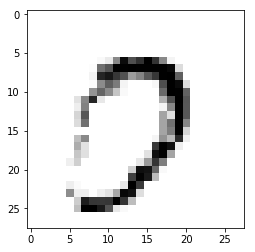

'\nEpoch: 0001, Cost: 2.826302672\nEpoch: 0002, Cost: 1.061668952\nEpoch: 0003, Cost: 0.838061315\nEpoch: 0004, Cost: 0.733232745\nEpoch: 0005, Cost: 0.669279885\nEpoch: 0006, Cost: 0.624611836\nEpoch: 0007, Cost: 0.591160344\nEpoch: 0008, Cost: 0.563868987\nEpoch: 0009, Cost: 0.541745171\nEpoch: 0010, Cost: 0.522673578\nEpoch: 0011, Cost: 0.506782325\nEpoch: 0012, Cost: 0.492447643\nEpoch: 0013, Cost: 0.479955837\nEpoch: 0014, Cost: 0.468893674\nEpoch: 0015, Cost: 0.458703488\nLearning finished\nAccuracy:  0.8951\n'

In [83]:
from tensorflow.examples.tutorials.mnist import input_data
import random

mnist = input_data.read_data_sets('mnist_data/', one_hot=True)
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs=15
batch_size=100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #TRAINING CYCLE
    for epochs in range(training_epochs):
        avg_cost=0
        for i in range(num_iterations):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size)
            c,_=sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost+=c/num_iterations
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))  
        